In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#!pip install jinja2

##### Ejercicio 1

Ejercicio 1: Aplicando la Transformada Z, y utilizando la propiedad de desplazamiento en el tiempo, determine la función de transferencia H(z) de los siguientes sistemas LTI causales:

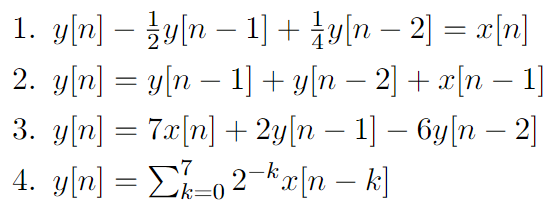

Utilizamos las propiedades de linealidad y desplazamiento

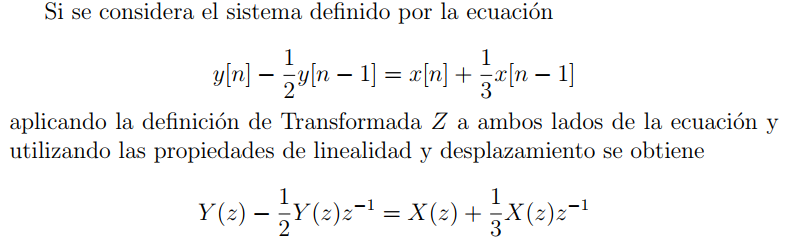

para obtener una expresión de $H(z) = \frac{Y(z)}{X(z)}$ .

##### Ejercicio 2

La Transformada Z y la Transformada de Fourier están relacionadas evaluando la Transformada Z sobre el círculo unitario ($|z|=1$):

$$
Z\{x[n]\} = X(z) = \sum_{n=-\infty}^{\infty} x[n]z^{-n}
$$

Si $z = e^{j\omega}$, se obtiene la Transformada de Fourier:

$$
X(e^{j\omega}) = \sum_{n=-\infty}^{\infty} x[n]e^{-j\omega n}
$$

Por lo tanto,

$$
X(e^{j\omega}) = X(z)\big|_{z = e^{j\omega}}
$$

---
Se sabe también que la función de transferencia $H(z) = \frac{Y(z)}{X(z)}$ es la transformada Z de la respuesta al impulso h[n], al evaluarla en en circulo r=1 obtenemos la transformada de Fourier de la respuesta al impulso h[n] y recibe el nombre de *respuesta en frecuencia*.

$$
H(e^{j\omega}) = H(z)\big|_{z = e^{j\omega}}
$$

- La misma nos muestra cómo responde el sistema a cada frecuencia $\omega$ de entrada. Es decir, describe cómo se atenúan o amplifican las distintas componentes frecuenciales de la señal de entrada al pasar por el sistema. Esta información nos sirve para analizar el comportamiento de filtros en el dominio de la frecuencia.

- Si esta evaluación se la realiza sobre una única vuelta del círculo unitario y a intervalos discretos determinados, entonces estamos en el caso de la Transformada Discreta de Fourier. Es decir la TDF se obtiene al evaluar la Transformada Z en $N$ puntos equiespaciados sobre el círculo unitario:

$$
X[k] = X(z)\big|_{z = e^{j\frac{2\pi}{N}k}}, \quad k = 0, 1, \ldots, N-1
$$



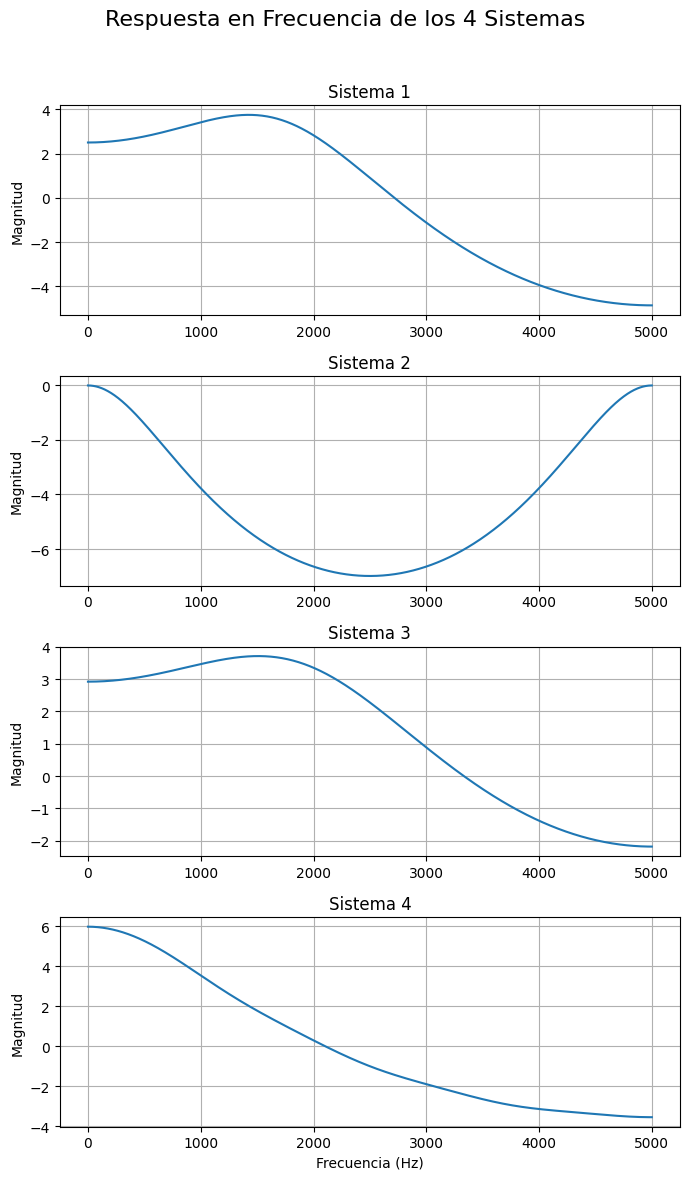

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

fs = 10000
w = np.linspace(0, np.pi, 1024)
f = w * fs / (2 * np.pi)  #frecuencia en hz

sistemas = [
    #H(z) = 1 / (1 - 1/2 z^{-1} + 1/4 z^{-2})
    ([1], [1, -0.5, 0.25]),
    #H(z) = z^{-1} / (1 - z^{-1} - z^{-2})
    ([0, 1, 0], [1, -1, -1]),
    #H(z) = 7 / (1 - 2 z^{-1} + 6 z^{-2})
    ([7], [1, -2, 6]),
    #H(z) = sum_{k=0}^{7} (1/2)^k z^{-k}
    ([0.5**k for k in range(8)], [1]),
]


fig, axs = plt.subplots(4, 1, figsize=(7, 12))
fig.suptitle("Respuesta en Frecuencia de los 4 Sistemas", fontsize=16)

for i, (b, a) in enumerate(sistemas):
    z = np.exp(1j * w)
    #el z**-1 indica que el polinomio es en z^{-1}
    H = np.polyval(b, z**-1) / np.polyval(a, z**-1)
    axs[i].plot(f, 20 * np.log10(np.abs(H)))
    axs[i].set_title(f"Sistema {i+1}")
    axs[i].set_ylabel("Magnitud") #en decibeles?
    axs[i].grid(True)

axs[-1].set_xlabel("Frecuencia (Hz)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()